# Aircraft Risk Analysis for Business Investment

## Introduction

This project aims to help a company newly entering the aviation industry make data-driven decisions on which aircraft types to invest in for both commercial and private operations. Given the considerable risk involved in aviation, particularly regarding safety and regulatory liability, a careful review of historical accident data is essential. The findings of this analysis will serve as a foundation for investment and operational planning.

The analysis is based on historical civil aviation accident data recorded from 1962 to 2023. This data, maintained by the National Transportation Safety Board (NTSB), provides detailed records of accidents involving aircraft in the United States and international airspace. Each entry includes information such as aircraft type, accident severity, causes, and outcomes.

Understanding which aircraft have the fewest and least severe accidents—and why—is crucial in determining the lowest-risk aircraft for a company looking to enter this high-stakes field.


## Business Problem 

Your company is expanding into new industries to diversify its portfolio. Specifically, the company is interested in purchasing and operating airplanes for both commercial and private enterprises. However, it currently lacks an understanding of the potential risks associated with aircraft operations. You have been tasked with identifying the lowest-risk aircraft options to help guide this new venture. Your analysis must yield actionable insights that the leadership of the new aviation division can use to make informed investment decisions.

## Objectives

Our analysis focuses on four key objectives that will support safe and strategic decision-making:

1. **Identify Aircraft Types with the Lowest Accident Rates**  
   By analyzing the number of accidents associated with each aircraft model, we know which aircraft are more reliable and less likely to fail or mishandle.

2. **Analyze the Severity of Accidents**  
    I will use columns like fatalities, injuries, and aircraft damage to determine accident seriousness per aircraft type.

   Aircraft types associated with more survivable accidents will be preferred.


4. **Investigate What are the Common Causes of Accidents**  
   I will assess contributing conditions, such as flight phase and weather, to understand operational risks.

5. **Recommend Low-Risk Aircraft for New Investment**  
    Recommend Low-Risk Aircraft for New Investment
Integrate the findings to identify aircraft models with the best overall safety profile.



In [5]:
#importing pandas
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# Loading AviationData
full_df = pd.read_csv("data/AviationData.csv", encoding = 'latin-1', low_memory = False)
full_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


## Data Overview

The dataset used for this analysis was sourced from the National Transportation Safety Board (NTSB). It includes accident reports from 1962 to 2023 and covers civil aviation incidents. The key columns used include:

- `Make and Model`: Identifies the aircraft type.

- `Event.Date`: Date of the accident.

- `Injury.Severity`: Measure of severity (Fatal, Serious).

- `Total.Fatal.Injuries`, `Total.Serious.Injuries`, `Total.Minor.Injuries`, `Total.Uninjured`: Injury data in numbers.

- `Aircraft.damage`: Damage level (Substantial, Destroyed).

- `Weather.Condition`: Visual or Instrument conditions (VMC (bad) or IMC (good)).

- `Broad.phase.of.flight`: When the accident occurred (Landing, Cruise).

- `Purpose.of.flight`: Mission type (Personal, Instructional).

This will enables me to segment risk by aircraft model, Severity and  it's causes.


## Data Cleaning and Preparation

To clean the dataset, I will carry out this steps:

  
   - Dropping rows with missing values in this columns as they are very critical for our analysis: `Make`, `Model`, `Total.Fatal.Injuries`, `Total.Serious.Injuries`,`Total.Minor.Injuries`, `Total.Uninjured`, `Aircraft.damage`,`Purpose.of.flight`

In [10]:
# Using dropna to drop rows with missing values
cleaned_df = full_df.dropna(subset=["Make", "Model", "Total.Fatal.Injuries", "Total.Serious.Injuries",
                                    "Total.Minor.Injuries", "Total.Uninjured", "Aircraft.damage",
                                    "Purpose.of.flight"])

In [11]:
cleaned_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,IMC,Unknown,Probable Cause,06-11-2001
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982


 Dropped records are 20,520 which is 23% of the total data. That's much, but it still leaves a very large dataset of over 68,000 rows

In [14]:
# Checks for the values in the make column
cleaned_df["Make"].value_counts()

Make
Cessna                   17911
Piper                     9753
CESSNA                    4254
Beech                     3401
PIPER                     2532
                         ...  
Fronsman                     1
Slingsby Aviation Plc        1
Niquette                     1
Moran                        1
ORLICAN S R O                1
Name: count, Length: 6696, dtype: int64

There are values in `Make` column which repeats themselves but in lower and upper case such as cessna and CESSNA

I will correct it by making all of them uppercase

In [17]:
cleaned_df['Make'] = cleaned_df['Make'].str.upper().str.strip()
cleaned_df["Make"].value_counts()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_32248\2690328754.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['Make'] = cleaned_df['Make'].str.upper().str.strip()


Make
CESSNA           22165
PIPER            12285
BEECH             4289
BELL              2003
MOONEY            1073
                 ...  
RAMESBOTHAM          1
SCHULER              1
MROTEK               1
STOUT                1
ORLICAN S R O        1
Name: count, Length: 6184, dtype: int64

- Filling missing `Broad.phase.of.flight` and `Weather.Condition` with "Unknown" so as not to lose a significant amount of data.

In [19]:
# Filling NaN values of 'Broad.phase.of.flight' with 'Unknown'
cleaned_df['Broad.phase.of.flight'] = cleaned_df['Broad.phase.of.flight'].fillna('Unknown')

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_32248\3566724270.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['Broad.phase.of.flight'] = cleaned_df['Broad.phase.of.flight'].fillna('Unknown')


In [21]:
cleaned_df['Broad.phase.of.flight'].value_counts()

Broad.phase.of.flight
Unknown        21481
Landing        11570
Takeoff         9825
Cruise          7971
Maneuvering     6430
Approach        5058
Climb           1540
Taxi            1430
Descent         1377
Go-around       1055
Standing         540
Other             92
Name: count, dtype: int64

We see that Unknown makes much of the data (30% thereabout), but it is not a significant problem as we will use this column just partially

- mapping Unk to UNK for consistency and replacing NaN with 'UNK' in `Weather.Condition` column

In [30]:
# mapping Unk to UNK for consistency and filling replacing NaN with 'UNK'
unkToUNK = {'Unk' : 'UNK', 'IMC' : 'IMC', 'UNK' : 'UNK', 'VMC' : 'VMC'}
cleaned_df['Weather.Condition'] = cleaned_df['Weather.Condition'].fillna('UNK').map(unkToUNK)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_32248\186305214.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['Weather.Condition'] = cleaned_df['Weather.Condition'].fillna('UNK').map(unkToUNK)


In [31]:
cleaned_df['Weather.Condition'].value_counts()

Weather.Condition
VMC    62047
IMC     4620
UNK     1702
Name: count, dtype: int64

unknown percentage is 2.49%, it is not that significant

- Standardizing `Injury.Severity` values:

In [36]:
# replacing 'NaN' with 'Unavailable'
cleaned_df.loc[cleaned_df['Injury.Severity'].isna(), 'Injury.Severity'] = 'Unavailable'

# Also I have seen there are many fatal with numbers on the side eg  (Fatal(2)), for uniformity I will remove the numbers
cleaned_df.loc[cleaned_df['Injury.Severity'].str.contains('Fatal\\('), 'Injury.Severity'] = 'Fatal'

In [38]:
cleaned_df['Injury.Severity'].value_counts().head()

Injury.Severity
Non-Fatal    53636
Fatal        13354
Incident      1015
Minor          190
Serious        133
Name: count, dtype: int64

 - Cleaning `Purpose.of.flight` by merging ambiguous codes:

In [41]:
cleaned_df['Purpose.of.flight'].value_counts()


Purpose.of.flight
Personal                     41098
Instructional                 8717
Unknown                       5596
Aerial Application            4104
Business                      3456
Positioning                   1204
Other Work Use                 935
Ferry                          724
Aerial Observation             660
Public Aircraft                523
Executive/corporate            447
Flight Test                    254
Skydiving                      109
External Load                   98
Air Race show                   90
Public Aircraft - Federal       78
Banner Tow                      76
Public Aircraft - Local         61
Public Aircraft - State         47
Glider Tow                      43
Firefighting                    31
Air Drop                         7
ASHO                             6
PUBS                             4
PUBL                             1
Name: count, dtype: int64

there are ambigous abbreviations that I do not know what they mean, I will look it up then replace with meaningful names

Also I will replace values that are not meaningful to the analysis with the value 'other'

In [44]:
# replacing ambigous abbreviations with meaningful names
cleaned_df['Purpose.of.flight'] = cleaned_df['Purpose.of.flight'].replace({'PUBL': 'Public Aircraft','PUBS': 'Public Aircraft','ASHO': 'Air Race show'})

# replacing values that are not meaningful to the analysis with 'other'
common_purposes = ['Personal', 'Business', 'Instructional', 'Ferry', 'Executive/corporate','Aerial Observation', 'Aerial Application', 'Public Aircraft', 'Other Work Use']
cleaned_df['Purpose.of.flight'] = cleaned_df['Purpose.of.flight'].apply(lambda x: x if x in common_purposes else 'Other')

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_32248\2559140639.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['Purpose.of.flight'] = cleaned_df['Purpose.of.flight'].replace({'PUBL': 'Public Aircraft','PUBS': 'Public Aircraft','ASHO': 'Air Race show'})
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_32248\2559140639.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['Purpose.of.flight'] = cleaned_df['Purpose.of.flight'].apply(lambda x: x if x in common_purposes else 'Other')


In [46]:
cleaned_df['Purpose.of.flight'].value_counts()

Purpose.of.flight
Personal               41098
Instructional           8717
Other                   7700
Aerial Application      4104
Business                3456
Other Work Use           935
Ferry                    724
Aerial Observation       660
Public Aircraft          528
Executive/corporate      447
Name: count, dtype: int64

## Data Analysis

### Accident Frequency Analysis 
   - Counting total accidents per aircraft model and ranking aircraft from fewest to most accidents to isolate low-risk types.

In [50]:
# group by Make and Model
grouped = cleaned_df.groupby(["Make", "Model"])

# count how many times each model appears and sort by the count from smallest to largest
accident_counts = grouped.size().reset_index(name="Accident Count").sort_values(by='Accident Count', ascending=False)

accident_counts.head(5)

,Make,Model,Accident Count
3268,CESSNA,152,2095
3289,CESSNA,172,1522
3331,CESSNA,172N,940
10333,PIPER,PA-28-140,784
3243,CESSNA,150,743


This aircraft models above are the top 5 most involved in accidents.

They dominate records, suggesting they are among the most used and also the most exposed to incident reporting across general aviation operations.

#### Visualization: Top 10 Aircraft Models by Accident Count

In [54]:
top_models = cleaned_df.groupby(["Make", "Model"])
top_models = top_models.size().reset_index(name="Accident Count").sort_values(by="Accident Count", ascending=False).head(10)

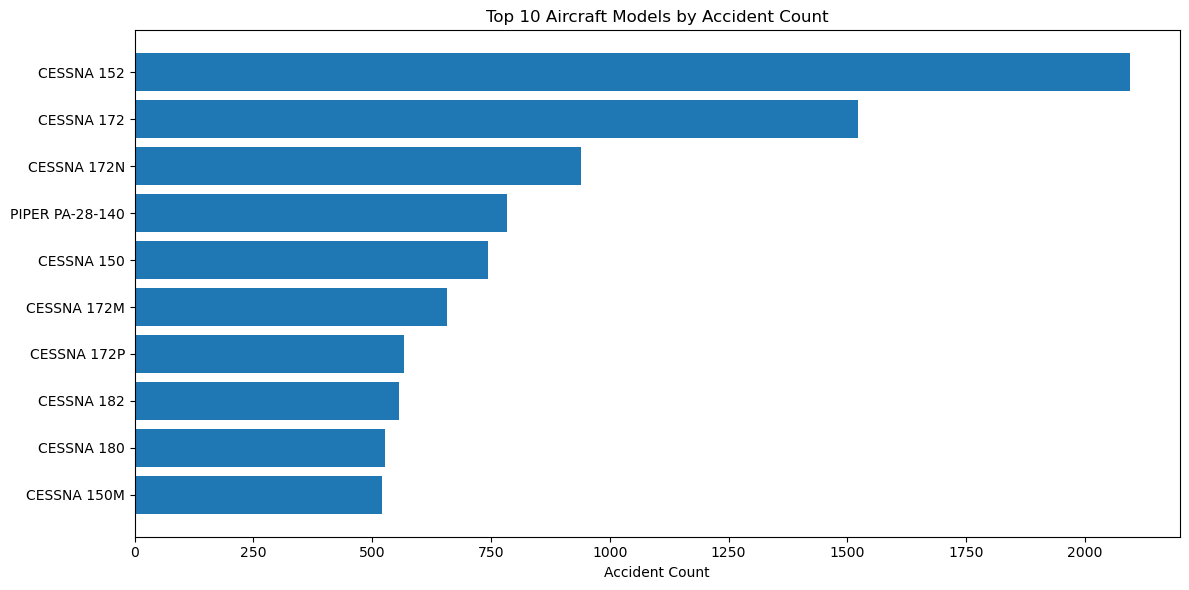

In [56]:
# sorting the aircraft by accident count, from highest to lowest
accident_counts_sorted = accident_counts.sort_values(by="Accident Count", ascending=False)

# taking only the top 10 most frequent ones
top_models = accident_counts_sorted.head(10)

# combining Make and Model into one label for better display
labels = top_models["Make"] + " " + top_models["Model"]

# horizontal bar chart to show accident counts for these top 10 aircraft
plt.figure(figsize=(12, 6))
plt.barh(labels, top_models["Accident Count"])
plt.xlabel("Accident Count")  # x axis shows number of accidents
plt.title("Top 10 Aircraft Models by Accident Count")  # graph title
plt.gca().invert_yaxis()  # so highest is at the top
plt.tight_layout()
plt.show()

##### Findings

- The Cessna 172 and Piper PA-28 appear most frequently, likely due to widespread civilian training and personal use.

- High accident counts can reflect popularity and flight volume rather than inherent aircraft risk.

- These models dominate general aviation, making them critical targets for safety interventions

#### Visualization: Top 10 Manufacturers by Total Accidents

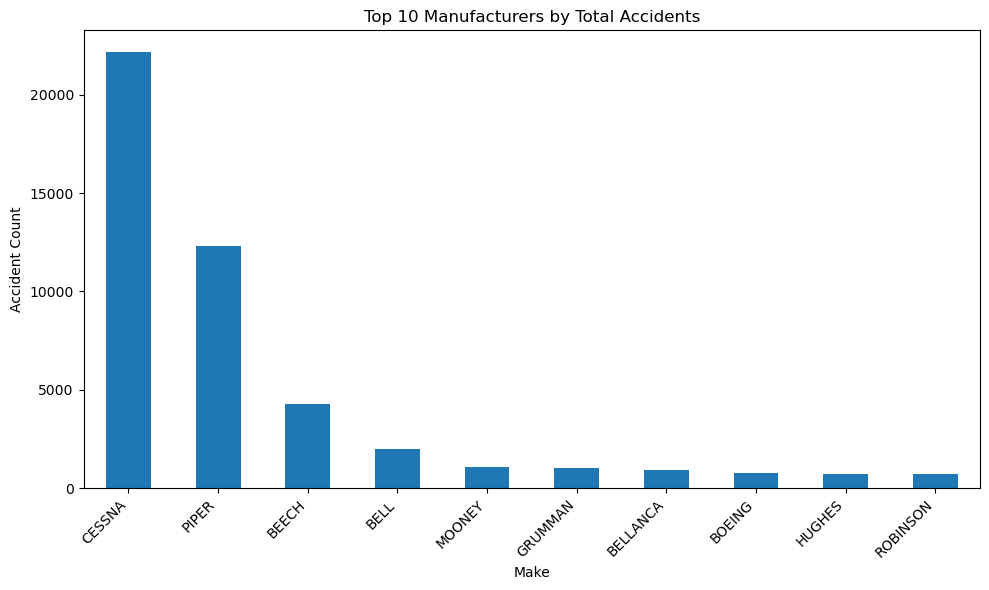

In [61]:
top_makes = (
    cleaned_df["Make"]
    .value_counts()
    .head(10)
)

plt.figure(figsize=(10, 6))
top_makes.plot(kind="bar")
plt.ylabel("Accident Count")
plt.title("Top 10 Manufacturers by Total Accidents")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

##### Findings

### Severity Analysis 
   - Aggregating injuries and fatalities by model and assessing typical outcomes by aircraft type.

We aggregate fatal and non-fatal injuries by aircraft type and included the most common aircraft damage level. This helps identify aircrafts that are mostly involved in fatal or survivable incidents

In [67]:
severity_stats = (
    cleaned_df.groupby(['Make', 'Model'])
    .agg({'Total.Fatal.Injuries': 'sum','Total.Serious.Injuries': 'sum','Total.Minor.Injuries': 'sum','Total.Uninjured': 'sum','Aircraft.damage': lambda x: x.value_counts().idxmax()})
    .reset_index()
    .sort_values(by='Total.Fatal.Injuries', ascending=False)
)

In [68]:
severity_stats.head()

,Make,Model,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Aircraft.damage
3331,CESSNA,172N,346.0,177.0,284.0,1101.0,Substantial
3268,CESSNA,152,343.0,175.0,361.0,2103.0,Substantial
10350,PIPER,PA-28-181,322.0,91.0,163.0,529.0,Substantial
3289,CESSNA,172,273.0,279.0,336.0,2007.0,Substantial
2471,BOEING,747-121,270.0,2.0,3.0,519.0,Substantial


This gives insight into which aircraft types, while frequently flown, have also seen more severe outcomes historically.

#### Visualization: Top 10 Aircraft Models by Total Fatalities

In [71]:
# group by Make and Model so we can analyze each aircraft type
grouped = cleaned_df.groupby(["Make", "Model"])

# do the sum
severity_by_model = grouped[["Total.Fatal.Injuries", "Total.Serious.Injuries", "Total.Minor.Injuries"]].sum().reset_index()

In [72]:
# sort aircraft types by the number of fatal injuries, from highest to lowest
top_fatal = severity_by_model.sort_values(by="Total.Fatal.Injuries", ascending=False)

top_fatal = top_fatal.head(10)

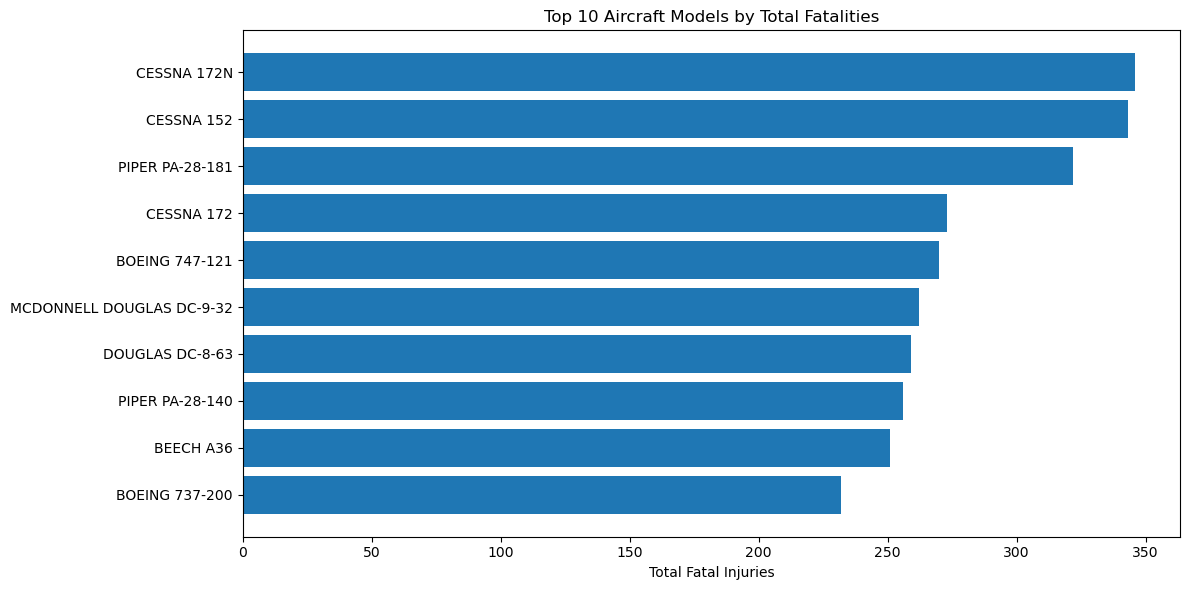

In [73]:
# combine Make and Model into one label for easier plotting
labels = top_fatal["Make"] + " " + top_fatal["Model"]

# draw a horizontal bar chart to show fatal injuries
plt.figure(figsize=(12, 6))
plt.barh(labels, top_fatal["Total.Fatal.Injuries"])
plt.xlabel("Total Fatal Injuries")  # x axis label
plt.title("Top 10 Aircraft Models by Total Fatalities")  # chart title
plt.gca().invert_yaxis()  # so the most fatalities show at the top
plt.tight_layout()
plt.show()

##### Findings

- Models with the highest fatalities also tend to have high accident counts, indicating potential risk exposure rather than unique danger.

- Fatality totals can be skewed by specific high-casualty incidents.

- Cessna and Piper models show up again, supporting the need for further normalization when interpreting raw numbers.

#### Visualization:Injury Severity Breakdown (Top 10 Aircraft by Total Injuries)

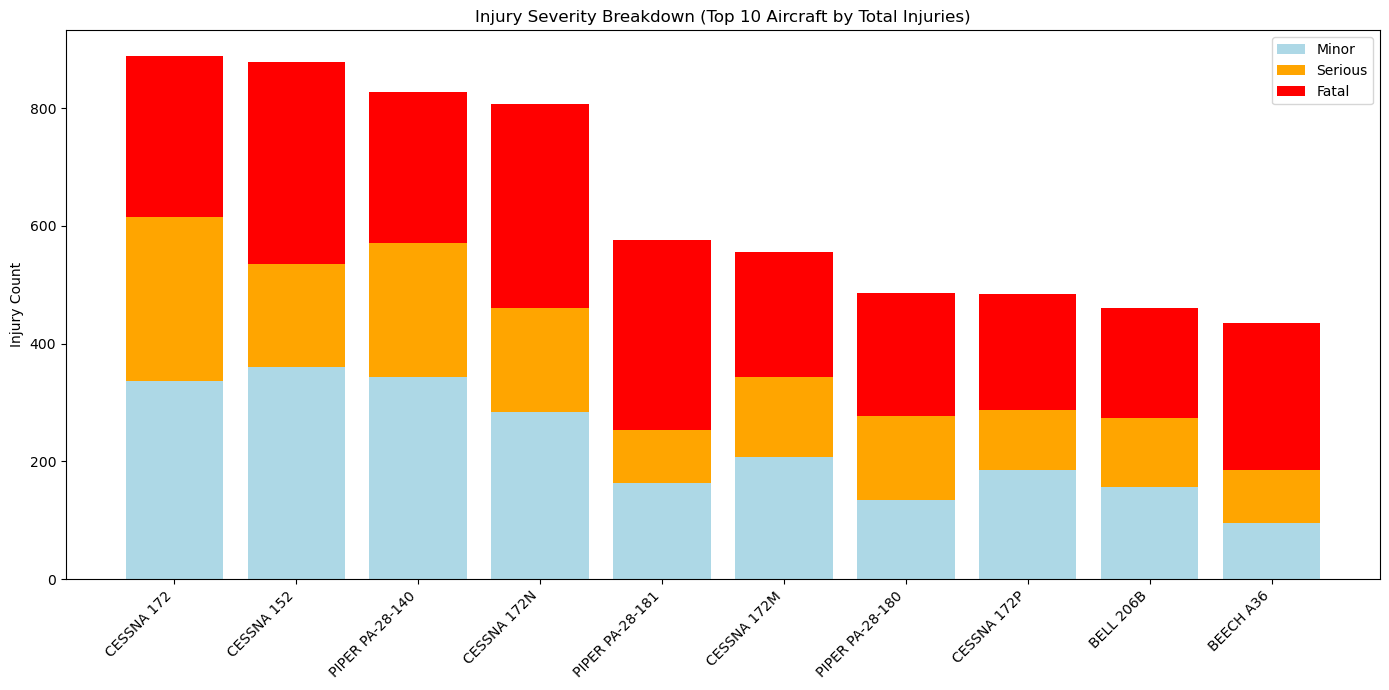

In [77]:
top_combined = severity_by_model.copy()
top_combined["Total"] = top_combined[["Total.Fatal.Injuries", "Total.Serious.Injuries", "Total.Minor.Injuries"]].sum(axis=1)
top_combined = top_combined.sort_values(by="Total", ascending=False).head(10)

labels = top_combined["Make"] + " " + top_combined["Model"]
fatal = top_combined["Total.Fatal.Injuries"]
serious = top_combined["Total.Serious.Injuries"]
minor = top_combined["Total.Minor.Injuries"]

plt.figure(figsize=(14, 7))
plt.bar(labels, minor, label="Minor", color="lightblue")
plt.bar(labels, serious, bottom=minor, label="Serious", color="orange")
plt.bar(labels, fatal, bottom=minor + serious, label="Fatal", color="red")
plt.ylabel("Injury Count")
plt.title("Injury Severity Breakdown (Top 10 Aircraft by Total Injuries)")
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()

##### Findings

- Some aircraft (e.g., Piper PA-28) show a larger proportion of minor and serious injuries, suggesting higher survivability.

- Injury patterns reveal which aircraft tend to protect occupants better during crashes.

- Even among popular models, severity distributions vary — likely due to use-case differences (e.g., training vs. transport).

### Cause Analysis
   - Analyze accident conditions using `Weather.Condition`, `Broad.phase.of.flight`, and `Purpose.of.flight`.

We examined the most common conditions under which accidents occurred for each aircraft type. This includes weather conditions, phase of flight, and operational purpose:

In [82]:
cause_analysis = (cleaned_df.groupby(['Make', 'Model'])
    .agg({'Weather.Condition': lambda x: x.value_counts().idxmax(),'Broad.phase.of.flight': lambda x: x.value_counts().idxmax(),'Purpose.of.flight': lambda x: x.value_counts().idxmax()})
    .reset_index()
    .rename(columns={'Weather.Condition': 'Most_Common_Weather','Broad.phase.of.flight': 'Most_Common_Phase','Purpose.of.flight': 'Most_Common_Purpose'
    })
)

#### Most common weather under which accidents occur

In [84]:
cause_analysis["Most_Common_Weather"].value_counts()

Most_Common_Weather
VMC    13452
IMC      506
UNK      313
Name: count, dtype: int64

#### Visualisation: Accident Distribution by Weather Condition

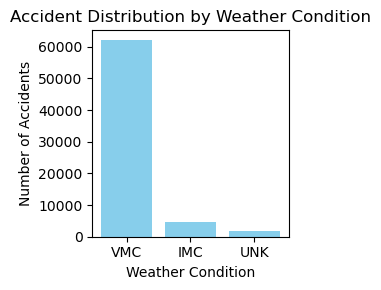

In [86]:
weather_counts = cleaned_df["Weather.Condition"].value_counts()

plt.figure(figsize=(3, 3))
plt.bar(weather_counts.index, weather_counts.values, color="skyblue")
plt.title("Accident Distribution by Weather Condition")
plt.xlabel("Weather Condition")
plt.ylabel("Number of Accidents")
plt.tight_layout()
plt.show()

##### Findings

- Most accidents occur in Visual Meteorological Conditions (VMC) indicating weather isn’t the main cause.

- Instrument Meteorological Conditions (IMC), while less frequent, may contribute to more severe outcomes.

- Operational and pilot error appear more influential than weather alone in accident causation.


#### Most common phase under which accidents occur

In [90]:
cause_analysis["Most_Common_Phase"].value_counts()

Most_Common_Phase
Unknown        6047
Takeoff        1958
Landing        1662
Maneuvering    1474
Cruise         1294
Approach        958
Climb           267
Taxi            203
Descent         193
Go-around       110
Standing         80
Other            25
Name: count, dtype: int64

#### Visualisation: Accidents by Phase of Flight

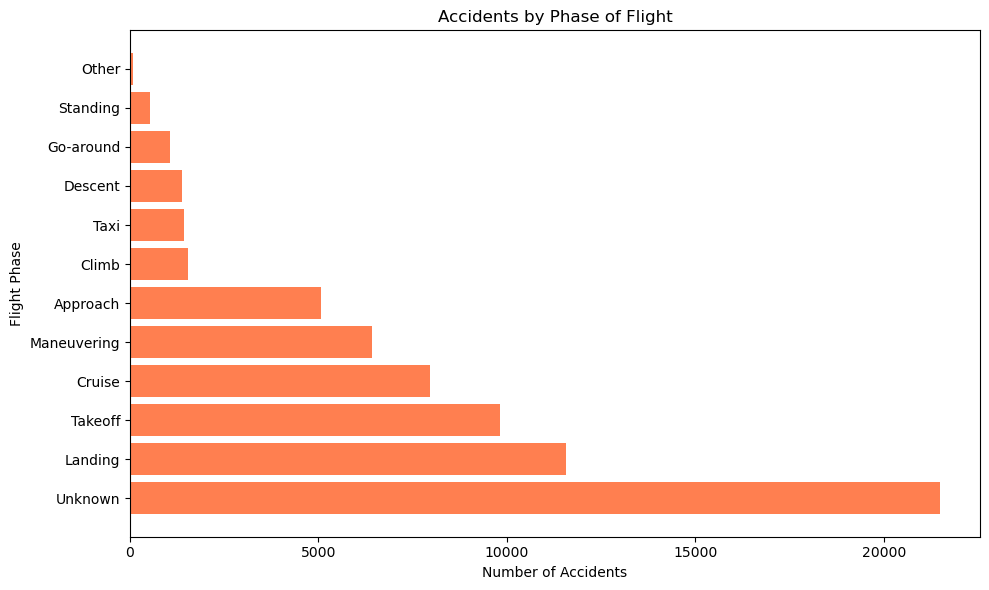

In [92]:
phase_counts = cleaned_df["Broad.phase.of.flight"].value_counts()

plt.figure(figsize=(10, 6))
plt.barh(phase_counts.index, phase_counts.values, color="coral")
plt.title("Accidents by Phase of Flight")
plt.xlabel("Number of Accidents")
plt.ylabel("Flight Phase")
plt.tight_layout()
plt.show()

##### Findings

- Landing and approach phases account for the highest number of accidents.

- The cruise phase has the lowest risk, reflecting stable conditions and fewer maneuvers.

- Takeoff and climb phases also show elevated risk — suggesting critical need for focus during transitional phases.

In [99]:
cause_analysis["Most_Common_Purpose"].value_counts()

Most_Common_Purpose
Personal               9894
Other                  1973
Instructional           766
Aerial Application      602
Business                445
Other Work Use          179
Ferry                   138
Executive/corporate     110
Public Aircraft          97
Aerial Observation       67
Name: count, dtype: int64

#### Visualization: Aircraft Accidents by Decade

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_32248\1018166743.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["Event.Date"] = pd.to_datetime(cleaned_df["Event.Date"], errors="coerce")
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_32248\1018166743.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["Decade"] = (cleaned_df["Event.Date"].dt.year // 10) * 10


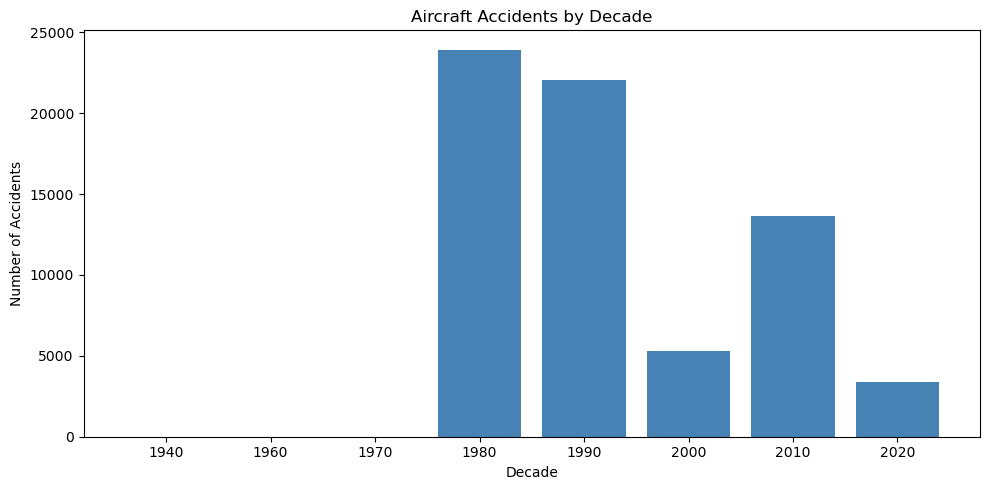

In [102]:
# convert the date column to proper date format
cleaned_df["Event.Date"] = pd.to_datetime(cleaned_df["Event.Date"], errors="coerce")

# extract the decade (like 1980s, 1990s, etc.)
cleaned_df["Decade"] = (cleaned_df["Event.Date"].dt.year // 10) * 10

# count how many accidents happened in each decade
decade_counts = cleaned_df["Decade"].value_counts().sort_index()

# draw the bar chart to show accident trends over time
plt.figure(figsize=(10, 5))
plt.bar(decade_counts.index.astype(str), decade_counts.values, color="steelblue")
plt.xlabel("Decade")  # x axis label
plt.ylabel("Number of Accidents")  # y axis label
plt.title("Aircraft Accidents by Decade")  # chart title
plt.tight_layout()
plt.show()

##### Findings

- Accident counts increased sharply during the 1980s and 1990s, possibly due to expanded private and commercial flight operations.

- The 2000s remain the peak, followed by a visible decline in the 2010s, suggesting improvements in aircraft safety and training.

- The 2020s show fewer accidents, although this may reflect incomplete reporting for the current decade or a drop due to pandemic-related flight reductions.

### Risk Recommendation  
   - Normalize and combine frequency and severity into a unified risk score.
   - Rank aircraft based on overall safety and reliability.

In [107]:
accident_counts = (
    cleaned_df.groupby(["Make", "Model"])
    .size()
    .reset_index(name="Accident Count")
)

severity_stats = (
    cleaned_df.groupby(["Make", "Model"])
    .agg({
        "Total.Fatal.Injuries": "sum",
        "Total.Serious.Injuries": "sum",
        "Total.Minor.Injuries": "sum",
        "Total.Uninjured": "sum",
        "Aircraft.damage": lambda x: x.value_counts().idxmax()
    })
    .reset_index()
)

risk_summary = pd.merge(accident_counts, severity_stats, on=["Make", "Model"])
risk_summary["Fatality Rate"] = (
    risk_summary["Total.Fatal.Injuries"] /
    (risk_summary["Total.Fatal.Injuries"] + risk_summary["Total.Uninjured"])
)

risk_summary_filtered = risk_summary.dropna(subset=["Fatality Rate"])
risk_summary_filtered = risk_summary_filtered[risk_summary_filtered["Accident Count"] > 100]
risk_summary_sorted = risk_summary_filtered.sort_values(
    by=["Fatality Rate", "Accident Count"], ascending=[False, False]
)

In [108]:
risk_summary_sorted

,Make,Model,Accident Count,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Aircraft.damage,Fatality Rate
11383,ROBINSON,R44,122,104.0,35.0,28.0,94.0,Substantial,0.525253
3795,CESSNA,P210N,156,100.0,53.0,60.0,112.0,Substantial,0.471698
1521,BEECH,A36,331,251.0,90.0,95.0,343.0,Substantial,0.422559
2213,BELLANCA,8KCAB,115,53.0,24.0,21.0,75.0,Substantial,0.414062
9267,MOONEY,M20F,143,94.0,31.0,37.0,137.0,Substantial,0.406926
...,...,...,...,...,...,...,...,...,...
3284,CESSNA,170,146,18.0,19.0,39.0,206.0,Substantial,0.080357
6471,GRUMMAN,G-164B,173,12.0,9.0,19.0,140.0,Substantial,0.078947
3425,CESSNA,185,220,34.0,12.0,54.0,411.0,Substantial,0.076404
10254,PIPER,PA-20,109,13.0,7.0,16.0,163.0,Substantial,0.073864


## Recommendations

1. Invest in aircraft models with consistently low accident frequency and high survivability.
2. Examples include the Cessna 180D, De Havilland DHC-8-102, and Howard DGA-15P, all of which showed no fatalities across multiple incidents.
3. Avoid aircraft types with high fatality records or frequent crashes during critical flight phases.
4. Focus operational training and risk management on landing and approach phases, which showed the most accident activity across all models.
5. Select aircraft that perform reliably in both Visual (VMC) and Instrument (IMC) weather conditions, as weather risk is often underestimated!


## Next Steps

1. Conduct a cost-benefit and maintenance feasibility study for shortlisted safe aircraft like the Cessna 180D and DHC-8-102.
3. Develop pilot training programs and safety protocols that specifically target high-risk phases like approach and landing.
4. Invest in technology and operational procedures that enhance safety under poor weather conditions, especially for IMC scenarios.
5. Monitor industry safety trends and update selection criteria annually as new accident data and aviation technologies emerge

##  Conclusion

Our analysis shows that some aircraft are safer than others. Models like the Cessna 180D and DHC-8-102 have low accident and injury rates, while others like the Boeing 737 show higher fatality numbers.

Most accidents happen during landing and approach, even in good weather. Flying is getting safer overall, and choosing the right aircraft and preparing for risky phases makes all the difference.

In [112]:
cleaned_df.to_excel('Cleaned_Aviation_data.xlsx', index = False)

IllegalCharacterError: The failure of the nose gear during landing for reasons that could not be determined due to postaccident damage.  cannot be used in worksheets.